<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Volatility-Measures" data-toc-modified-id="Volatility-Measures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Volatility Measures</a></span><ul class="toc-item"><li><span><a href="#Close-To-Close" data-toc-modified-id="Close-To-Close-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Close To Close</a></span></li><li><span><a href="#Parkinson" data-toc-modified-id="Parkinson-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parkinson</a></span></li><li><span><a href="#Garman-Klass" data-toc-modified-id="Garman-Klass-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Garman Klass</a></span></li><li><span><a href="#Rogers-Satchell" data-toc-modified-id="Rogers-Satchell-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Rogers Satchell</a></span></li><li><span><a href="#Yang-Zhang" data-toc-modified-id="Yang-Zhang-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Yang Zhang</a></span></li><li><span><a href="#Duration" data-toc-modified-id="Duration-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Duration</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization</a></span></li></ul></div>

In [13]:
import pandas as pd
import numpy as np
from MachineTrading.AlgoTradingApp.app_run import AppBond
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from MachineTrading.TSA import volatility as vl

## Volatility Measures

The volatility definitions are taken from https://portfolioslab.com/

### Close To Close

Close-to-Close volatility is a classic and most commonly used volatility measure, sometimes referred to as historical volatility.

Close-to-close historical volatility calculated using only stock's closing prices. It is the simplest volatility estimator. But in many cases, it is not precise enough. Stock prices could jump considerably during a trading session, and return to the open value at the end. That means that a big amount of price information is not taken into account by close-to-close volatility.

Despite its drawbacks, Close-to-Close volatility is still useful in cases where the instrument doesn't have intraday prices. For example, mutual funds calculate their net asset values daily or weekly, and thus their prices are not suitable for more sophisticated volatility estimators.

$$ \sigma_{cl} = \sqrt{\frac{1}{T-1}\sum_{t=1}^T(r_t-\bar{r})^2} $$

### Parkinson

Parkinson volatility is a volatility measure that uses the high and low price of the day.

The main difference between regular volatility and Parkinson volatility is that the latter uses high and low prices for a day, rather than only the closing price. 

That is useful as close to close prices could show little difference while large price movements could have happened during the day. Thus Parkinson's volatility is considered to be more precise and requires less data for calculation than the close-close volatility.

One drawback of this estimator is that it doesn't take into account price movements after market close. Hence it systematically undervalues volatility. That drawback is taken into account in the Garman-Klass's volatility estimator.

$$ \sigma_{Parkinson} = \sqrt{\frac{1}{4T\ln{2}}\sum_{t=1}^T\ln{\bigg(\frac{h_t}{l_t}\bigg)^2}} $$

### Garman Klass

Garman Klass is a volatility estimator that incorporates open, low, high, and close prices of a security.

Garman-Klass volatility extends Parkinson's volatility by taking into account the opening and closing price. As markets are most active during the opening and closing of a trading session, it makes volatility estimation more accurate.

Garman and Klass also assumed that the process of price change is a process of continuous diffusion (geometric Brownian motion). However, this assumption has several drawbacks. The method is not robust for opening jumps in price and trend movements.

Despite its drawbacks, the Garman-Klass estimator is still more effective than the basic formula since it takes into account not only the price at the beginning and end of the time interval but also intraday price extremums.

$$ \sigma_{GK} = \sqrt{\frac{1}{2T}\sum_{t=1}^T\ln\bigg(\frac{h_t}{l_t}\bigg)^2-\frac{2\ln2-1}{T}\ln\bigg(\frac{c_t}{o_t}\bigg)^2} $$

### Rogers Satchell

Rogers-Satchell is an estimator for measuring the volatility of securities with an average return not equal to zero.

Unlike Parkinson and Garman-Klass estimators, Rogers-Satchell incorporates drift term (mean return not equal to zero). As a result, it provides a better volatility estimation when the underlying is trending.

The main disadvantage of this method is that it does not take into account price movements between trading sessions. It means an underestimation of volatility since price jumps periodically occur in the market precisely at the moments between sessions.

$$ \sigma_{RS} = \sqrt{\frac{1}{T}\sum_{t=1}^T\bigg(\ln\bigg(\frac{h_t}{c_t}\bigg) \ln\bigg(\frac{h_t}{o_t}\bigg) + \ln\bigg(\frac{l_t}{c_t}\bigg) \ln\bigg(\frac{l_t}{o_t}\bigg)\bigg)}  $$

### Yang Zhang

Yang Zhang is a historical volatility estimator that handles both opening jumps and the drift and has a minimum estimation error.

We can think of the Yang-Zhang volatility as the combination of the overnight (close-to-open volatility) and a weighted average of the Rogers-Satchell volatility and the day’s open-to-close volatility. It considered being 14 times more efficient than the close-to-close estimator.

$$ \sigma_{YZ} = \sqrt{\sigma_o^2+k\sigma_c^2+(1-k)\sigma_{RS}^2} $$

Where:

$$ k = \frac{\alpha-1}{\alpha+\frac{T+1}{T-1}}$$

$$ \sigma_o^2 = \frac{1}{T-1}\sum_{t=1}^T\bigg(\ln{\bigg(\frac{o_t}{c_{t-1}}\bigg)-Avg \ln{\bigg(\frac{o_t}{c_{t-1}}\bigg)}\bigg)^2} $$

$$ \sigma_c^2 = \frac{1}{T-1}\sum_{t=1}^T\bigg(\ln{\bigg(\frac{c_t}{o_t}\bigg)-Avg \ln{\bigg(\frac{c_t}{o_t}\bigg)}\bigg)^2} $$

### Duration

Modified duration measures the change in the value of a bond in response to a change in 100-basis-point (1%) change in interest rates. 

Modified duration is an extension of the Macaulay duration, and in order to calculate modified duration, the Macaulay duration must first be calculated.

## Visualization

In [14]:
BTP_ISINS = [x.split('.')[0] for x in os.listdir("../AlgoTradingApp/Data/BondInfo") if 'IT0' in x]

In [15]:
bonds = {x:AppBond(x) for x in BTP_ISINS}

In [74]:
volatility = {}
for isin, bond in bonds.items():
    bond.update_data(dt.date(2022,3,23))
    df = bond.get_current_price_data().set_index('Date').copy()    
    aux = {}
    aux['CloseToClose'] = vl.close_to_close(df)
    aux['Parkinson'] = vl.parkinson(df)
    aux['GarmanKlass'] = vl.garman_klass(df)
    aux['RogersSatchell'] = vl.rogers_satchell(df)
    aux['YangZhang'] = vl.yang_zhang(df)
    aux['Maturity'] = bond.years_to_maturity
    aux['Duration'] = bond.duration/100 / np.sqrt(252)
    aux['Drift'] = df['Close'].pct_change().mean()
    volatility[isin] = aux
    

In [75]:
volatility = pd.DataFrame(volatility).T.sort_values(by=['Maturity'])

In [79]:
volatility

,CloseToClose,Parkinson,GarmanKlass,RogersSatchell,YangZhang,Maturity,Duration,Drift
IT0005441719,0.000249,0.000122,0.000130,0.000140,0.000281,0.060233,0.000035,-0.000015
IT0005447187,0.000115,0.000239,0.000237,0.000248,0.000355,0.227242,0.000141,-0.000014
IT0005482937,0.000123,0.000196,0.000216,0.000238,0.000268,0.440794,0.000273,-0.000013
IT0005440679,0.000227,0.000406,0.000455,0.000524,0.000531,0.687201,0.000429,-0.000019
IT0005486748,0.000286,0.000394,0.000406,0.000428,0.000504,0.974675,0.000612,-0.000017
IT0005424251,0.000908,0.000785,0.000804,0.000833,0.000968,1.815195,0.001139,-0.000073
IT0005408502,0.001686,0.001401,0.001411,0.001430,0.001665,3.274470,0.001995,-0.000221
IT0005454241,0.002469,0.001843,0.001783,0.001797,0.002256,4.358658,0.002730,-0.000258
IT0005390874,0.002630,0.002037,0.001937,0.001919,0.002379,4.815880,0.002954,-0.000287
IT0005433690,0.003298,0.002579,0.002469,0.002454,0.002991,5.979466,0.003710,-0.000355


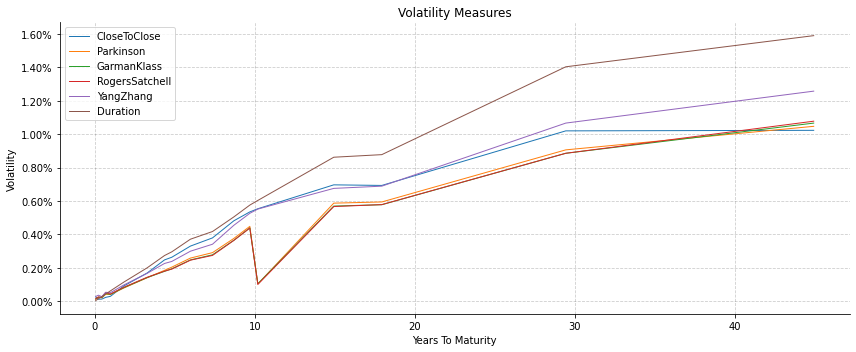

In [81]:
plot_df = volatility.set_index('Maturity').drop(['Drift'], axis=1)

fig, ax = plt.subplots(figsize=(12,5))
for col in plot_df.columns:
    ax.plot(plot_df[col]*100, lw=1.0, label=col)
    
ax.set_xlabel("Years To Maturity")
ax.set_ylabel("Volatility")
ax.set_title(f"Volatility Measures")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.grid(axis='both', alpha=0.2, color='k', ls='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='best')
plt.tight_layout()
plt.show()

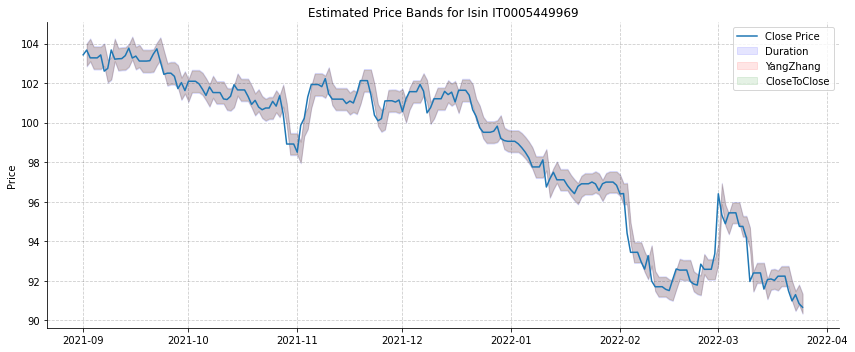

In [146]:
isin = "IT0005449969"

aux = bonds[isin].get_current_price_data().set_index('Date')[['Close']].copy()
isin_vola = volatility.loc[isin]

aux['CCUpper'] = (aux['Close']*(1+isin_vola['CloseToClose'])).shift(1)
aux['CCLower'] = (aux['Close']*(1-isin_vola['CloseToClose'])).shift(1)

aux['YZUpper'] = (aux['Close']*(1+isin_vola['YangZhang'])).shift(1)
aux['YZLower'] = (aux['Close']*(1-isin_vola['YangZhang'])).shift(1)

aux['DurUpper'] = (aux['Close']*(1+isin_vola['Duration'])).shift(1)
aux['DurLower'] = (aux['Close']*(1-isin_vola['Duration'])).shift(1)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(aux['Close'], label='Close Price')
ax.fill_between(aux.index, aux['DurUpper'], aux['DurLower'], alpha=0.1, color='blue', label='Duration')
ax.fill_between(aux.index, aux['YZUpper'], aux['YZLower'], alpha=0.1, color='red', label='YangZhang')
ax.fill_between(aux.index, aux['CCUpper'], aux['CCLower'], alpha=0.1, color='green', label='CloseToClose')

ax.set_ylabel("Price")
ax.set_title(f"Estimated Price Bands for Isin {isin}")

ax.grid(axis='both', alpha=0.2, color='k', ls='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='best')
plt.tight_layout()
plt.show()